# Python code for the Scorbot robotic arm (project SMALL)

This python script includes the computation of the kinematics for the Scorbot robot. Thus, the forward and inverse kinematics are solved. The forward kinematics equations give an unique solution. However, the inverse kinematics equations depend on both the position of the wrist and the target position. 
The working principle of this script is to minimice the angle between consecutive joints. 

The notebook has been developped using Python 3

Most of the cells include markdown cells above to deeply explian its functionality.

#### Developed by Fernando Perez-Peña (UCA) (fernandoperez.pena@uca.es)

First, the packages needed are imported

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

The following cell has to be executed only once since it contains the values of the links and several parameters of the robotic platform

In [8]:
#print ("Introduce the lenghts of the links (cm)\n")
#l1 = float(input("Lenght of the first link "))
#l2 = float(input("Lenght of the second link "))
#l3 = float(input("Lenght of the third link "))
#l4 = float(input("Lenght of the third link "))
#l5 = float(input("Lenght of the third link "))

#Include the parameters of the robotic arm. 


In [9]:
print("Forward and inverse kinematics")
c=input("Type 'F' if you want to solve the forward kinematcis or 'I' if you want to solve the inverse kinematics problem")

Forward and inverse kinematics


The links of the arm need to be introduced to be able to compute the inverse kinematics problem. 
Suggestion: If you are going to use the notebook for one specific arm, you can introduce the links (cm) and remove the user input. 

In [10]:
# px = float(input("Which is the target position (X-axis)? "))
# py = float(input("Which is the target position (Y-axis)? "))
# pz = float(input("Which is the target position (Z-axis)? "))
px = 70
py = 0
pz = 0

We are going to represent the possibilities for the wirst:

In [11]:
circle1 = plt.Circle((0, 0), l1+l2, fc='None', color='r')
circle2 = plt.Circle((px, py), l3, fc='None', color='b')


fig_wirst_region = plt.figure(figsize=(15, 15), dpi=80)
ax = fig_wirst_region.add_subplot(111)
ax.set_xlim(0,l1+l2+l3)
ax.set_ylim(-2*l3,2*l3)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.set_yticks(np.arange(-2*l3,2*l3,0.5))
ax.tick_params(labelsize=8) 
ax.grid()


#Now we are going to set the criterion of fixing the wrist the closest to the target position. 

print ("In dotted green you find the line where wx=px and that line goes from (-l3,l3)")
ax.plot([px,px],[-l3,+l3],'g--')

##NOT SURE WHAT IS REPRESENTING THE CODE BELOW

from sympy import *

x,y= symbols('x,y')
#print "If we make wx=px (taking the most vertical solution)"
[y1,y2] = solve([(px-px)**2+(y-py)**2-l3**2],dict=True)
#print y1,y2

#print "If we make wy=py (pushing the last link to be completely horizontal)"
[x1,x2] = solve([(x-px)**2+(py-py)**2-l3**2], dict=True)
#print x1,x2

circle_1 = Eq((x-px)**2+(y-py)**2,l3**2)
circle_2= Eq(x**2+y**2,(l1+l2)**2)
(x,y)=solve([circle_1,circle_2],(x,y))

ax.plot(x[0],x[1],'o')
ax.plot(y[0],y[1],'o')

ax.plot(px,py,'*')

print ("The solution is:")
print (x[0],",",x[1])
print (y[0],",",y[1])

print ("All the points in that curve are valid solutions for (wx,wy)")

a=np.array([x[1]-py],dtype=np.float64)
b=np.array([x[0]-px],dtype=np.float64)

c1=np.arctan2(a,b)#* 180 / np.pi
print (c1* 180 / np.pi)

a=np.array([y[1]-py],dtype=np.float64)
b=np.array([y[0]-px],dtype=np.float64)

c2=np.arctan2(a,b)#* 180 / np.pi
print (c2* 180 / np.pi)


#We set the angle values to positive values so we can then create the incremental array 
if (c1<0): 
    c1=c1+2*np.pi
elif (c2<0):
    c2=c2+2*np.pi

print ("Angles updated according to the anti-clock wise direction")
print (c1* 180 / np.pi)
print (c2* 180 / np.pi)

#Now, c1 and c2 are positive angles (anti clock-wise reference) and we can build the incremental vector of angles. 
if (c1>c2): 
    print ("Since we are only interested in approaching the target from above, we limited the range of theta from %f to 180 degrees"%(c2*180/np.pi))
    theta=np.arange(c2,np.pi,0.0001)
    first_border=c2
    #theta=np.arange(c2,c1,0.001)
else:
    print ("Since we are only interested in approaching the target from above, we limited the range of theta from %f to 180 degrees"%(c1*180/np.pi))
    theta=np.arange(c1,np.pi,0.0001)
    first_border=c1
    #theta=np.arange(c1,c2,0.001)
    
#We give values to the the arch which are posible solutions for the wirst. 
x_=px+l3*np.cos(theta)
y_=py+l3*np.sin(theta)

#To plot, we use a reduced set of angles (for the shake of clarity)
ax.plot(x_,y_,'*')


NameError: name 'l1' is not defined

Now, we have to set wx=lambda*px and try to maximize the resulting function or minimize the function (1-lamda)
wx=px+l3cos(theta)
wx=lambda*px
lamddapx=px+l3cos(theta)
lambda=f(theta)=1+(1/px)(l3cos(theta))
(1-lambda)=g(theta)=-(1/px)(l3cos(theta))
g'(theta)=l3sin(theta)/px
Lambda= 2.1233854041429768e-05
wx= 29.99936298437876
The cos(theta)= 1.721663841194801e-05
The theta is 89.99901355928155
wx= 29.99936298437876
wy= 16.999999994516365


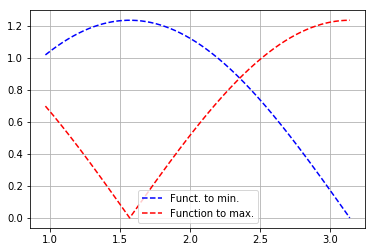

In [15]:
print ("Now, we have to set wx=lambda*px and try to maximize the resulting function or minimize the function (1-lamda)")

#theta=np.arange(c1,c2+(2*np.pi),0.0001)
#x_=px+l3*np.cos(theta)
#wx=lm*px
#lm*px = px+l3*np.cos(theta)
#lm=1+(1/px)*(l3*np.cos(theta))
#the function 1-lm = -l3*np.cos(theta)/px
#derivative: l3*np.sin(theta)/px

print ("wx=px+l3cos(theta)")
print ("wx=lambda*px")
print ("lamddapx=px+l3cos(theta)")
print ("lambda=f(theta)=1+(1/px)(l3cos(theta))")
print ("(1-lambda)=g(theta)=-(1/px)(l3cos(theta))")
print ("g'(theta)=l3sin(theta)/px")

fun=(l3*np.sin(theta))/px

aux=abs(fun)
#aux=fun

#print aux
print ("Lambda=",aux.min())

print ("wx=",(1-aux.min())*px)
#This is the maximum value for lambda
lm=1-aux.min()

print ("The cos(theta)=",px*(1-lm)/l3)
          
theta_selected=np.arccos(px*(1-lm)/l3)
print ("The theta is",theta_selected * 180 / np.pi)

#We have to check if the theta is included within the range to set the sign of the angle
if ((theta_selected<first_border)):# and (theta_selected>np.pi)) : 
    print ("The only solution, to have a right approach to the target is to do it from below")
    theta_selected=-np.arccos(px*(1-lm)/l3)
    
    print ("Or using wx=lambdapx, wx=%fpx"%lm)
    wx=float(x[0])
    wy=float(x[1])
    
    
else: 
    
    wx=lm*px
    wy=py+l3*np.sin(theta_selected)
    
    
plt.plot(theta,aux,'b--',label="Funct. to min.")
plt.plot(theta,abs(-l3*np.cos(theta)/px),'r--',label="Function to max.")
plt.grid()
plt.legend()

print ("wx=",wx)
print ("wy=",wy)



## The following cell is not needed anymore

wrist = (raw_input("Which is the wirst position you want to introduce (WX or WY)? "))

if (wrist == "wx"):
    wx = float(raw_input("Please, introduce the position of the wrist for the X-axis "))
    
    wy1 = py-np.sqrt(l3*l3-(px-wx)**2)
    wy2 = py+np.sqrt(l3*l3-(px-wx)**2)
    
    print "These are the options for wy:"
    print "wy_1=",wy1,"or wy_2=", wy2
    print "Which one do you select? (1 or 2) "
    if (int(raw_input ()) == 1 ): 
        wy = wy1
    else:
        wy = wy2
    
    
elif (wrist == "wy"):
    wy = float(raw_input("Please, introduce the position of the wrist for the Y-axis "))
    
    wx1 = px-np.sqrt(l3*l3-(py-wy)**2)
    wx2 = px+np.sqrt(l3*l3-(py-wy)**2)
    
    print "These are the options for wx:"
    print "wx_1=",wx1,"or wx_2=", wx2
    print "Which one do you select? (1 or 2) "
    if (int(raw_input ()) == 1 ): 
        wx = wx1
    else:
        wx = wx2
    
else: 
    print ("Error")

print "\nData introduced:"
print "l1=",l1
print "l2=",l2
print "l3=",l3,"\n"
print "px=",px
print "py=",py
print "wx=",wx
print "wy=",wy

In [16]:
#The second restriction: 
#print "The second restriction:"
print ("Is the following restriction met?")
print ("(l1+l2)>=sqrt(wx^2+wy^2)")
print (l1+l2,">=",np.sqrt(wx*wx+wy*wy),"\n")

#Check if the wirst position is in the work-space of the robot 
if (l1+l2)<(np.sqrt(wx*wx+wy*wy)):
    print ("The wirst is out of the work-space")
    #print "To continue, we are going to change the value of wx by subtracting 1.0 to the original value"
    #wx=wx-1.0

#Computation of the cos(q2)(c3)
c2=(wy*wy+wx*wx-l1*l1-l2*l2)/(2*l1*l2)
print ("cos(q2)=",c2)
print ("If cos has a positivesign, the angle should be on the first or fourth quadrant")
print ("If cos has a negative sign, the angle should be on the second or third quadrant\n")

#Computation of the sin(q2)(s3)
#The sign choosen will determine the up or down elbow configuration
s2=-np.sqrt(1-c2*c2)
#Computation of q2    
q2=np.arctan2(s2,c2)

if (q2*180/np.pi)>0 : 
    print ("q2[0]=",q2*180/np.pi,"First quadrant","or, which is equivalent:")
    print ("q2[1]=",360-q2*180/np.pi, "fourth quadrant")
    
else: 
   
    print ("q2[0]=",q2*180/np.pi+360,"fourth quadrant","or, which is equivalent:")
    print ("q2[1]=",-q2*180/np.pi,"first quadrant ")
    
q2_bis=-q2

Is the following restriction met?
(l1+l2)>=sqrt(wx^2+wy^2)
52.0 >= 34.4813250801368 

cos(q2)= -0.14775622781661296
If cos has a positivesign, the angle should be on the first or fourth quadrant
If cos has a negative sign, the angle should be on the second or third quadrant

q2[0]= 261.5030810093602 fourth quadrant or, which is equivalent:
q2[1]= 98.4969189906398 first quadrant 


In [17]:
print ("We are going to consider q2=%f"%(q2*180/np.pi))
#Computation of the cos(q1)(c1)

c1=(l2*s2*wy+wx*(l1+l2*c2))/(l1*l1+2*l1*l2*c2+l2*l2)
    
print ("cos(q1)=",c1)
    
#Computation of the sin(q1)(s1)
print ("The sign of the sin of q1 could be positive or negative:")
s1=np.sqrt(1-c1*c1)
s1_bis=-np.sqrt(1-c1*c1)
print (s1,"or",s1_bis)
#Computation of q1
q1=np.arctan2(s1,c1)
q1_bis=np.arctan2(s1_bis,c1)
#To print the angle, uncomment the following line: 
print ("So we have two angles sets:")
print ("q1=",q1*180/np.pi)
print ("q2=",q2*180/np.pi)
print ("---")
print ("q1=",q1_bis*180/np.pi)
print ("q2=",q2*180/np.pi)

print ("******************************************")

print ("We are going to consider q2=%f"%(q2_bis*180/np.pi))
#Computation of the cos(q1)(c1)

c1=(l2*(np.sin(q2_bis))*wy+wx*(l1+l2*c2))/(l1*l1+2*l1*l2*c2+l2*l2)
    
print ("cos(q1)=",c1)
    
#Computation of the sin(q1)(s1)
print ("Here again, the sign of the sin of q1 could be positive or negative:")
s1_1=np.sqrt(1-c1*c1)
s1_1_bis=-np.sqrt(1-c1*c1)
#Computation of q1
q1_1=np.arctan2(s1_1,c1)
q1_1_bis=np.arctan2(s1_1_bis,c1)

print ("So we have two angles sets:")
print ("q1=",q1_1*180/np.pi)
print ("q2=",q2_bis*180/np.pi)
print ("---")
print ("q1=",q1_1_bis*180/np.pi)
print ("q2=",q2_bis*180/np.pi)

We are going to consider q2=-98.496919
cos(q1)= 0.01901327836356617
The sign of the sin of q1 could be positive or negative:
0.9998192312842705 or -0.9998192312842705
So we have two angles sets:
q1= 88.91055374833586
q2= -98.4969189906398
---
q1= -88.91055374833586
q2= -98.4969189906398
******************************************
We are going to consider q2=98.496919
cos(q1)= 0.8674882282371948
Here again, the sign of the sin of q1 could be positive or negative:
So we have two angles sets:
q1= 29.831945542493155
q2= 98.4969189906398
---
q1= -29.831945542493155
q2= 98.4969189906398


Now, we are plotting the angles we already have, q1 and q2.
The partial end-effetor should be at the user-defined wrist position


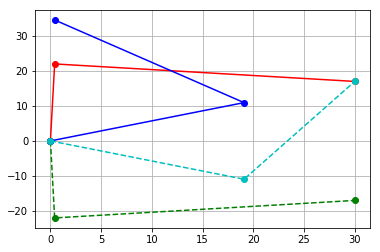

In [18]:
print ("Now, we are plotting the angles we already have, q1 and q2." )
print ("The partial end-effetor should be at the user-defined wrist position")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([0,l1*np.cos(q1),l1*np.cos(q1)+l2*np.cos(q1+q2)],[0,l1*np.sin(q1),l1*np.sin(q1)+l2*np.sin(q1+q2)],'r-o')
ax.plot([0,l1*np.cos(q1_bis),l1*np.cos(q1_bis)+l2*np.cos(q1_bis+q2_bis)],[0,l1*np.sin(q1_bis),l1*np.sin(q1_bis)+l2*np.sin(q1_bis+q2_bis)],'g--o')

ax.plot([0,l1*np.cos(q1_1),l1*np.cos(q1_1)+l2*np.cos(q1_1+q2_bis)],[0,l1*np.sin(q1_1),l1*np.sin(q1_1)+l2*np.sin(q1_1+q2_bis)],'b-o')
ax.plot([0,l1*np.cos(q1_1_bis),l1*np.cos(q1_1_bis)+l2*np.cos(q1_1_bis+q2_bis)],[0,l1*np.sin(q1_1_bis),l1*np.sin(q1_1_bis)+l2*np.sin(q1_1_bis+q2_bis)],'c--o')


ax.grid()

In [19]:
print ("We are going to discard the sets that are not reaching the wrist position")
print ("wrist=",(wx,wy))
print ("So we have the following angles sets:")
print ("q1=",q1*180/np.pi)
print ("q2=",q2*180/np.pi)
print ("---")
print ("q1=",q1_bis*180/np.pi)
print ("q2=",q2*180/np.pi)
print ("---")
print ("q1=",q1_1*180/np.pi)
print ("q2=",q2_bis*180/np.pi)
print ("---")
print ("q1=",q1_1_bis*180/np.pi)
print ("q2=",q2_bis*180/np.pi)
print ("To see which of these are reaching the wirst position, we apply direct kinematics")
print ("Direct kinematics for a two links arm:")
print ("wx=l1*cos(q1)+l2*cos(q1+q2)")
print ("wy=l1*sin(q1)+l2*sin(q1+q2)")

#Build arrays for each set 
q1_set=(q1,q1_bis,q1_1,q1_1_bis)
q2_set=(q2,q2,q2_bis,q2_bis)

#for loop to test the direct kinematics
k=0
#We allocate two positions since only two valid configurations are possible (elbow up/down)
q1=np.zeros(2)
q2=np.zeros(2)
for i in range (len(q1_set)):
    print ("%d set of angles:"%i)
    print ((q1_set[i],q2_set[i]))
    wx_reached=l1*np.cos(q1_set[i])+l2*np.cos(q1_set[i]+q2_set[i])
    wy_reached=l1*np.sin(q1_set[i])+l2*np.sin(q1_set[i]+q2_set[i])
    print ("(wx,wy)=",(wx_reached,wy_reached))
    if ((np.abs(wx_reached-wx)<0.001) and (np.abs(wy_reached-wy)<0.001)):
        print ("Selected set")
        q1[k]=q1_set[i]
        q2[k]=q2_set[i]
        k=k+1


We are going to discard the sets that are not reaching the wrist position
wrist= (29.99936298437876, 16.999999994516365)
So we have the following angles sets:
q1= 88.91055374833586
q2= -98.4969189906398
---
q1= -88.91055374833586
q2= -98.4969189906398
---
q1= 29.831945542493155
q2= 98.4969189906398
---
q1= -29.831945542493155
q2= 98.4969189906398
To see which of these are reaching the wirst position, we apply direct kinematics
Direct kinematics for a two links arm:
wx=l1*cos(q1)+l2*cos(q1+q2)
wy=l1*sin(q1)+l2*sin(q1+q2)
0 set of angles:
(1.5517819026798465, -1.7190955394567944)
(wx,wy)= (29.99936298437876, 16.999999994516365)
Selected set
1 set of angles:
(-1.5517819026798465, -1.7190955394567944)
(wx,wy)= (-29.331338553747514, -18.128275095207364)
2 set of angles:
(0.5206656719921515, 1.7190955394567944)
(wx,wy)= (0.47951176127910955, 34.47799077314201)
3 set of angles:
(-0.5206656719921515, 1.7190955394567944)
(wx,wy)= (29.999362984378756, 16.999999994516365)
Selected set


In [20]:
#Calculate the angle phi     

phi=np.arctan2((py-wy),(px-wx))

q3=np.zeros(2)
#To print the angle, uncomment the following line: 
print ("phi=",phi*180/np.pi)

#Computation of q3
q3[0]=phi-(q2[0]+q1[0])
print ("q3[0]=",q3[0]*180/np.pi)

q3[1]=phi-(q2[1]+q1[1])
print ("q3[1]=",q3[1]*180/np.pi)

phi= -89.99901355928155
q3[0]= -80.4126483169776
q3[1]= -158.6639870074282


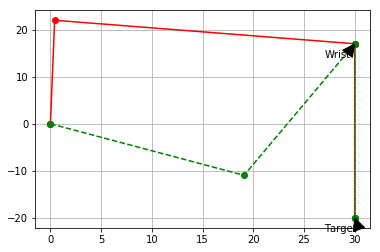

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
#Using the first set of angles
ax.plot([0,l1*np.cos(q1[0]),l1*np.cos(q1[0])+l2*np.cos(q1[0]+q2[0]),l1*np.cos(q1[0])+l2*np.cos(q1[0]+q2[0])+l3*np.cos(phi)],[0,l1*np.sin(q1[0]),l1*np.sin(q1[0])+l2*np.sin(q1[0]+q2[0]),l1*np.sin(q1[0])+l2*np.sin(q1[0]+q2[0])+l3*np.sin(phi)],'r-o')
    
#Using the second set of angles
ax.plot([0,l1*np.cos(q1[1]),l1*np.cos(q1[1])+l2*np.cos(q1[1]+q2[1]),l1*np.cos(q1[1])+l2*np.cos(q1[1]+q2[1])+l3*np.cos(phi)],[0,l1*np.sin(q1[1]),l1*np.sin(q1[1])+l2*np.sin(q1[1]+q2[1]),l1*np.sin(q1[1])+l2*np.sin(q1[1]+q2[1])+l3*np.sin(phi)],'g--o')
    
ax.plot([0,wx,px],[0,wy,py],'go')
ax.annotate('Wrist', xy=(wx, wy), xytext=(wx-3, wy-3),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Target', xy=(px, py), xytext=(px-3, py-3),arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()

In [22]:
print ("First angle set")
print ("q1",q1[0]*180/np.pi)
print ("q2",q2[0]*180/np.pi)
print ("q3",q3[0]*180/np.pi)
print ("******************")
print ("Second angle set")
print ("q1",q1[1]*180/np.pi)
print ("q2",q2[1]*180/np.pi)
print ("q3",q3[1]*180/np.pi)
print ("******************")
#double check of the positions calculated according to the direct kinematics
    
print ("We check the direct kinematics to see if the angles are correct (first set):")
px_direct_1=l1*np.cos(q1[0])+l2*np.cos(q1[0]+q2[0])+l3*np.cos(q1[0]+q2[0]+q3[0])
py_direct_1=l1*np.sin(q1[0])+l2*np.sin(q1[0]+q2[0])+l3*np.sin(q1[0]+q2[0]+q3[0])
print ("px=",px_direct_1)
print ("py=",py_direct_1)
print ("We check the direct kinematics to see if the angles are correct (second set):")
px_direct_2=l1*np.cos(q1[1])+l2*np.cos(q1[1]+q2[1])+l3*np.cos(q1[1]+q2[1]+q3[1])
py_direct_2=l1*np.sin(q1[1])+l2*np.sin(q1[1]+q2[1])+l3*np.sin(q1[1]+q2[1]+q3[1])
print ("px=",px_direct_2)
print ("py=",py_direct_2)

First angle set
q1 88.91055374833586
q2 -98.4969189906398
q3 -80.4126483169776
******************
Second angle set
q1 -29.831945542493155
q2 98.4969189906398
q3 -158.6639870074282
******************
We check the direct kinematics to see if the angles are correct (first set):
px= 30.0
py= -20.0
We check the direct kinematics to see if the angles are correct (second set):
px= 29.999999999999996
py= -20.0


In [23]:
print ("Values to introduce to the servos (first set)")
print ("Q1 is the same of the one computed")
print (q1[0]*180/np.pi)

print ("Q2")
if (q2[0]<0):
    print (np.abs(q2[0]*180/np.pi)+90)
else:
    print (90-q2[0]*180/np.pi)

print ("Q3")
if (q3[0]<0):
    print (np.abs(q3[0]*180/np.pi)+90)
else:
    print (90-q3[0]*180/np.pi)

    
print ("*********************************")
print ("Values to introduce to the servos (second set)")
print ("Q1 is the same of the one computed")
print (q1[1]*180/np.pi)

print ("Q2")
if (q2[1]<0):
    print (np.abs(q2[1]*180/np.pi)+90)
else:
    print (90-q2[1]*180/np.pi)

print "Q3"
if (q3[1]<0):
    print (np.abs(q3[1]*180/np.pi)+90)
else:
    print (90-q3[1]*180/np.pi)


Values to introduce to the servos (first set)
Q1 is the same of the one computed
88.91055374833586
Q2
188.4969189906398
Q3
170.4126483169776
*********************************
Values to introduce to the servos (second set)
Q1 is the same of the one computed
-29.831945542493155
Q2
-8.496918990639799
Q3
248.6639870074282
